In [1]:
import openmm
from simtk import unit
from openmm import app
import numpy as np
from openff.toolkit.topology import Molecule
from openff.toolkit.typing.engines.smirnoff import ForceField
from sys import stdout
#from openmmtools import integrators

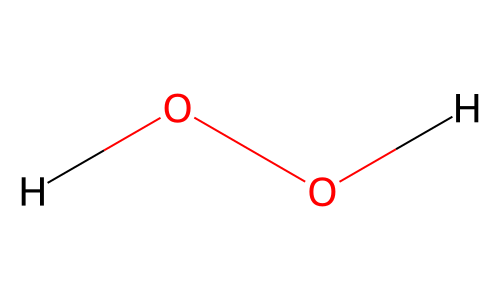

In [2]:
h2o2 = Molecule.from_pdb_and_smiles('H2O2_explicitH.pdb','OO')
off_topology = h2o2.to_topology()
omm_topology = off_topology.to_openmm()
positions = h2o2.conformers[0]

h2o2.visualize()

In [3]:
forcefield = ForceField("openff-2.0.0.offxml")
# Register the SMIRNOFF template generator
system = forcefield.create_openmm_system(topology=off_topology)
xml = openmm.XmlSerializer.serialize(system)
xml_file = open('xml_system.txt','w')
xml_file.write(xml)
xml_file.close()

/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/abbie/miniconda3/envs/openfftk_env/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [ ]:
temperature = 300.0 * unit.kelvin
collision_rate = 1.0 / unit.picosecond
timestep = 2.0 * unit.femtosecond
reportInterval = 2000
steps = 5E+8
#time = (steps*timestep).value_in_unit(unit.nanosecond)
# parameters = f'{temperature}\nCollision rate:{collision_rate}\nTimestep: {timestep}\nReport every {reportInterval} steps'
# with open('parameterfile.txt', 'w') as f:
#     f.write(parameters)

In [ ]:
integrator = openmm.LangevinIntegrator(temperature,collision_rate,timestep)
#integrator.setConstraintTolerance(0.00001)
#integrator = openmm.VerletIntegrator(timestep)
properties_dict = {}
properties_dict["DeviceIndex"] = "2"
platform = openmm.Platform.getPlatform(2)
simulation = app.Simulation(omm_topology, system, integrator,platform,platformProperties=properties_dict)
#print(platform.getPropertyValue(simulation.context,property='Precision'))
#print(simulation.context.getPlatform())
simulation.context.setPositions(positions)
simulation.minimizeEnergy()
simulation.context.setVelocitiesToTemperature(temperature)

simulation.reporters.append(app.StateDataReporter(stdout, reportInterval, step=True, potentialEnergy=True,temperature=True))
simulation.reporters.append(app.DCDReporter('h2o2trajectory_2.dcd',reportInterval))
#h5_reporter = reporters.HDF5Reporter('output.h5',reportInterval)
#simulation.reporters.append(h5_reporter)

In [ ]:
simulation.step(steps)
#h5_reporter.close()

In [ ]:
import mdtraj as md

traj = md.load('output.dcd',top=md.Topology.from_openmm(omm_topology))
import nglview
view = nglview.show_mdtraj(traj)
view